In [1]:
import pandas as pd
import numpy as np

In [2]:
customers = pd.read_csv("customer.csv")
productinfo = pd.read_csv("prod_cat_info.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print(customers.columns)
print(productinfo.columns)
print(transactions.columns)

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')
Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')
Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')


In [4]:
Customer1 = pd.merge(customers,transactions,how='inner',left_on=['customer_Id'],right_on=['cust_id'])

In [5]:
customer = pd.merge(Customer1,productinfo,how = 'inner',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

In [6]:
customer.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [7]:
customer.drop(columns={'cust_id','prod_sub_cat_code'},axis=1,inplace=True)

In [8]:
customer.dropna(inplace=True)

In [9]:
customer.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [10]:
customer['DOB']=pd.to_datetime(customer['DOB'],format='%d-%m-%Y').dt.date

In [11]:
customer['tran_date']=customer['tran_date'].str.replace('/','-')

In [12]:
customer['tran_date']=pd.to_datetime(customer['tran_date'],format='%d-%m-%Y').dt.date

In [13]:
#customer.to_csv("customer_final.csv",index=False)

In [14]:
#customer=pd.read_csv("Customer_final.csv")

In [15]:
#Answer 2a
customer.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [16]:
#Answer 2b
print(customer.head(10))
print(customer.tail(10))

    customer_Id         DOB Gender  city_code  transaction_id   tran_date  \
0        268408  1970-01-02      M        4.0     87243835584  2014-01-13   
1        275152  1970-01-16      M        4.0     73109425404  2011-03-25   
2        275034  1970-01-18      F        4.0     64777271023  2011-05-23   
3        270829  1970-01-22      F        8.0     87174343938  2013-12-09   
4        267657  1970-01-29      F        7.0     76242744953  2013-05-23   
5        274630  1970-02-01      M        4.0     78357345891  2012-04-11   
6        273541  1970-02-01      M        4.0     23916816961  2013-02-09   
7        269008  1970-02-13      F        6.0     35560569829  2013-03-09   
8        269008  1970-02-13      F        6.0     94033312891  2012-04-26   
10       272883  1970-02-19      M        5.0     35308880657  2013-12-01   

    prod_subcat_code  prod_cat_code  Qty  Rate      Tax  total_amt  \
0                  7              5    5   187   98.175   1033.175   
1           

In [17]:
#Answer 2d:
conti_variable = customer[['customer_Id','DOB','transaction_id','Qty','Rate','Tax','total_amt']]
cat_variable = customer[['Gender','city_code','prod_cat','prod_cat_code','prod_subcat','prod_subcat_code','Store_type']]
conti_variable.describe().loc[['min','25%','50%','75%','max']]

,customer_Id,transaction_id,Qty,Rate,Tax,total_amt
min,266783.00,3.268991e+06,-5.0,-1499.0,7.3500,-8270.925
25%,268936.00,2.492230e+10,1.0,312.0,98.2800,762.450
50%,270981.00,5.008942e+10,3.0,710.0,199.0800,1754.740
75%,273115.25,7.532632e+10,4.0,1109.0,365.7675,3569.150
max,275265.00,9.998755e+10,5.0,1500.0,787.5000,8287.500


In [18]:
#Answer 2d:
for i in cat_variable.columns:
      print(cat_variable[i].value_counts())

M    11805
F    11231
Name: Gender, dtype: int64
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2265
1.0     2258
9.0     2178
6.0     2123
Name: city_code, dtype: int64
Books               6064
Electronics         4894
Home and kitchen    4126
Footwear            2998
Clothing            2957
Bags                1997
Name: prod_cat, dtype: int64
5    6064
3    4894
6    4126
2    2998
1    2957
4    1997
Name: prod_cat_code, dtype: int64
Women                  3046
Mens                   2911
Kids                   1995
Tools                  1062
Fiction                1042
Kitchen                1037
Children               1034
Comics                 1031
Mobiles                1031
Bath                   1021
Furnishing             1006
Non-Fiction            1002
DIY                     988
Cameras                 984
Personal Appliances     972
Academic                967
Computers               956
Audio and video         951
Name: prod_sub

array([[<AxesSubplot: title={'center': 'customer_Id'}>,
        <AxesSubplot: title={'center': 'transaction_id'}>,
        <AxesSubplot: title={'center': 'Qty'}>],
       [<AxesSubplot: title={'center': 'Rate'}>,
        <AxesSubplot: title={'center': 'Tax'}>,
        <AxesSubplot: title={'center': 'total_amt'}>],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

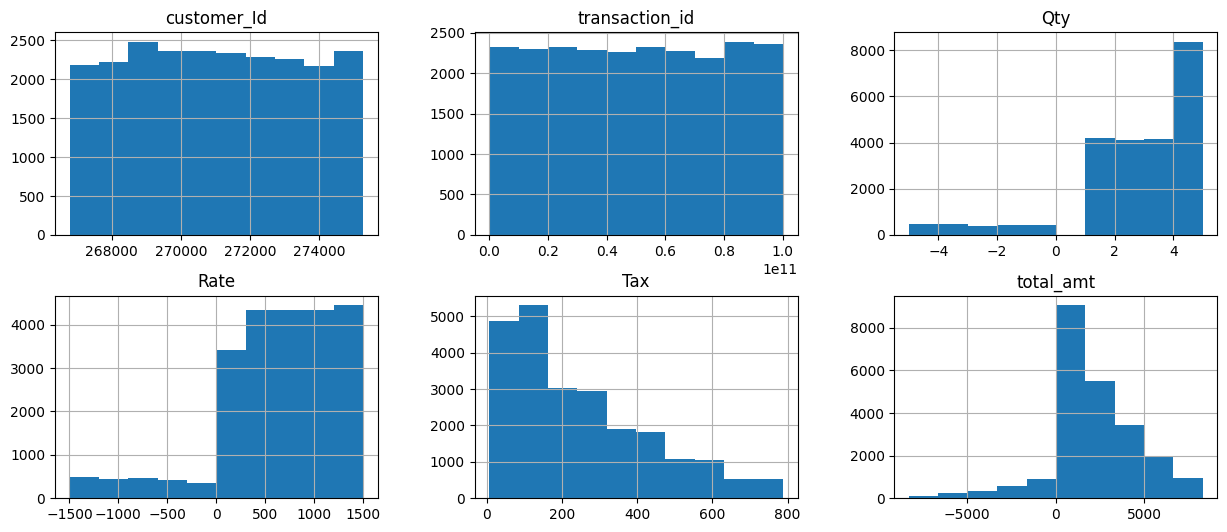

In [19]:
#Answer 3:
import seaborn as sns
import matplotlib.pyplot as plt
conti_variable.hist(figsize=(15,30),layout=(9,3))


In [20]:
#Answer 4a:
(pd.to_datetime(customer['tran_date'].max())-pd.to_datetime(customer['tran_date'].min())).days

1130

In [21]:
#Answer 4b:
len(customer[customer['total_amt']<0])

2176

In [22]:
#Answer 5:
customer.groupby('Gender')['prod_cat'].agg(lambda x: x.mode()[0])

Gender
F    Books
M    Books
Name: prod_cat, dtype: object

In [23]:
#Answer 6:
city_no = customer.pivot_table(index='city_code',values='customer_Id',aggfunc=['count', lambda x : round(len(x)*100/len(customer),1)])
city_no.columns = ['count', 'percentage']
city_no.sort_values('count',ascending=False).head(1)

,count,percentage
city_code,,
4.0,2422,10.5


From above we can see that city_cde = 4 has maximum no of users

In [24]:
#Answer 7:
print("store type that sells max by qty : ",customer.groupby('Store_type')['Qty'].count().sort_values(ascending=False).index[0])
print("store type that sells max by value : ",customer.groupby('Store_type')['total_amt'].sum().sort_values(ascending=False).index[0])



store type that sells max by qty :  e-Shop
store type that sells max by value :  e-Shop


In [25]:
#Answer 8:
customer['total_amt'][(customer['Store_type']=='Flagship store')&((customer['prod_cat']=='Electronics')|(customer['prod_cat']=='Clothing'))].sum()

3408936.0500000003

In [26]:
#Answer 9:
customer['total_amt'][(customer['Gender']=='M')&(customer['prod_cat']=='Electronics')].sum()

5697629.73

In [27]:
#Answer 10:
ncustomer=customer[['customer_Id','transaction_id']][customer['total_amt']>0]
(ncustomer.groupby('customer_Id')['transaction_id'].nunique()>10).sum()

6

In [30]:
#Answer 11:
#creating age columnf
from datetime import datetime
tday=datetime.now().year
customer['Age']=customer['DOB'].apply(lambda x: tday-x.year)


In [31]:
#creating filtered dataframe
filter_cust=customer[(customer['Age']<=35)&(customer['Age']>=25)].loc[:,('total_amt','tran_date','prod_cat')]
filter_cust['tran_date']=pd.to_datetime(filter_cust['tran_date'])

In [32]:
#Answer 11 a:
filter_cust['total_amt'][(filter_cust['prod_cat']=="Books")|(filter_cust['prod_cat']=="Electronics")].sum()

4939932.335

In [33]:
#Answer 11 b:
filter_cust['total_amt'][filter_cust['tran_date'].between('2014-01-01', '2014-03-01')].sum()

546350.675